<div style="background-color: salmon; color: black; padding: 10px; border-radius: 10px; text-align: center;">
    <h1>EDA for Car Price Prediction - Anjali Ramesh</h1>
</div>

<div style="background-color: moccasin; color: black; padding: 10px; border-radius: 10px; text-align: left;">
    <h3>Introduction About the Data</h3>
</div>

The dataset is obtained from [Kaggle](https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge).

#### **Objective** - Predict the `Price` of a car (Regression Analysis)

**Independent Features** - The original dataset has 17 independent features (including the `ID` column)

`ID`: Unique identifier for each car entry (integer)

`Levy`: Tax or fee applied to the car (object) 

`Manufacturer`: The manufacturer or brand of the car (object) 

`Model`: The model name of the car (object) 

`Prod. year`: The production year of the car (integer) 

`Category`: The category or type of the car (object) 

`Leather interior`: Indicates whether the car has a leather interior or not (object) 

`Fuel type`: The type of fuel used by the car (object) 

`Engine volume`: The engine displacement or volume of the car (object) 

`Mileage`: The distance traveled by the car (object) 

`Cylinders`: The number of cylinders in the car's engine (float) 

`Gear box type`: The type of gearbox used in the car (object) 

`Drive wheels`: The type of drive wheels (object) 

`Doors`: The number of doors in the car (object) 

`Wheel`: The type of wheel (object) 

`Color`: The color of the car (object) 

`Airbags`: The number of airbags in the car (integer) 


**The target feature**

`Price` : The target variable representing the price of the car (integer)

<div style="background-color: moccasin; color: black; padding: 10px; border-radius: 10px; text-align: left;">
    <h3>Importing The Required Modules</h3>
</div>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("Set3")

<div style="background-color: moccasin; color: black; padding: 10px; border-radius: 10px; text-align: left;">
    <h3>Data Reading and Info</h3>
</div>

In [47]:
df = pd.read_csv("data/car-price.csv", header=0)

In [48]:
df.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

<div style="background-color: moccasin; color: black; padding: 10px; border-radius: 10px; text-align: left;">
    <h3>Data Cleaning</h3>
</div>

This data requires some cleaning before we start exploring. From just looking at the sample and information, these are the immediate action items. More shall be applied while we explore the data

- `Levy` : This should be a numerical column since it is tax applied to the car (in dollars)
- `Mileage` : Also numerical. Remove the km that appears after the value
- `Doors` : Ordinal column. The values must be 2-3, 4-5, >5 (this is from Kaggle discussion page about the column)

In [50]:
mapping = {
    '04-May': '4-5',
    '02-Mar': '2-3',
    '>5': '>5'
}

df['Doors'] = df['Doors'].replace(mapping)

df['Mileage'] = df['Mileage'].apply(lambda x: float(x.split()[0]))

df['Levy'] = df['Levy'].replace('-', np.nan)
df['Levy'] = df['Levy'].str.replace('[^\d.]', '', regex=True).astype(float)

<div style="background-color: moccasin; color: black; padding: 10px; border-radius: 10px; text-align: left;">
    <h3>Checking for Missing Values</h3>
</div>

In [51]:
df.isna().sum()

ID                     0
Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

`Levy` is the only column with missing values. We can deal with that by replacing with the mean values of the corresponding `Levy` fields based on the same manufacturer and model

In [52]:
df['Levy'] = df.groupby(['Manufacturer', 'Model'])['Levy'].transform(lambda x: x.fillna(x.mean()))

<div style="background-color: moccasin; color: black; padding: 10px; border-radius: 10px; text-align: left;">
    <h3>Checking for Duplicated Rows and Dropping them</h3>
</div>

In [53]:
df.duplicated().sum()

313

In [54]:
df = df.drop_duplicates()

<div style="background-color: moccasin; color: black; padding: 10px; border-radius: 10px; text-align: left;">
    <h3>Descriptive Statistics</h3>
</div>

In [55]:
# Removing the ID row as it does not provide any useful information
df = df.drop('ID', axis=1)

### Numerical and Categorical columns seperation

In [56]:
numerical_columns = list(df.columns[df.dtypes!='object'])
categorical_columns = list(df.columns[df.dtypes=='object'])
print(f'Numerical Columns   : {numerical_columns}')
print(f'Categorical Columns : {categorical_columns}')

Numerical Columns   : ['Price', 'Levy', 'Prod. year', 'Mileage', 'Cylinders', 'Airbags']
Categorical Columns : ['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']


### Numerical Columns Description

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,18924.0,1.858744e+04,1.921356e+05,1.0,5331.000000,13172.000000,22063.00,2.630750e+07
Levy,17401.0,9.640323e+02,6.423450e+02,87.0,643.179173,810.733333,1091.00,1.171400e+04
Prod. year,18924.0,2.010914e+03,5.665749e+00,1939.0,2009.000000,2012.000000,2015.00,2.020000e+03
Mileage,18924.0,1.555373e+06,4.880221e+07,0.0,70195.750000,126400.000000,189119.75,2.147484e+09
Cylinders,18924.0,4.580216e+00,1.200223e+00,1.0,4.000000,4.000000,4.00,1.600000e+01
Airbags,18924.0,6.568379e+00,4.322323e+00,0.0,4.000000,6.000000,12.00,1.600000e+01


### Categorical Columns Description

In [58]:
df[categorical_columns].describe().T

,count,unique,top,freq
Manufacturer,18924,65,HYUNDAI,3729
Model,18924,1590,Prius,1069
Category,18924,11,Sedan,8600
Leather interior,18924,2,Yes,13731
Fuel type,18924,7,Petrol,9944
Engine volume,18924,107,2,3856
Gear box type,18924,4,Automatic,13282
Drive wheels,18924,3,Front,12695
Doors,18924,3,4-5,18032
Wheel,18924,2,Left wheel,17471


<div style="background-color: lightpink; color: black; padding: 10px; border-radius: 10px; text-align: center;">
    <h2>Univariate Analysis & Feature Engineering</h2>
</div>

### Categorical Columns

In [59]:
categorical_columns

['Manufacturer',
 'Model',
 'Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color']

#### Manufacturer

Let us keep the top 10 manufacturers (>3% of records for each manufacturer) and rename the others as "others"

In [60]:
top_manufacturers = df['Manufacturer'].value_counts().nlargest(10).index
df['Manufacturer'] = df['Manufacturer'].apply(lambda x: x if x in top_manufacturers else 'Other')

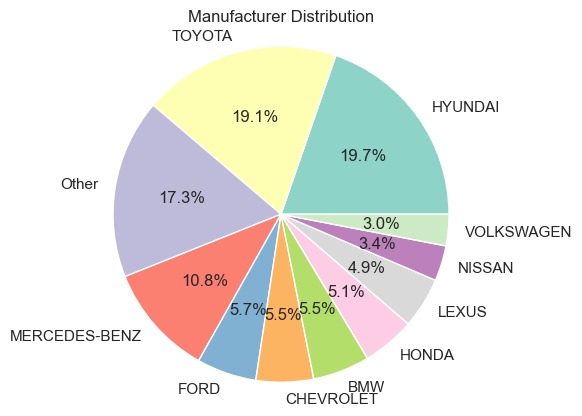

In [61]:
manufacturer_counts = df['Manufacturer'].value_counts()
plt.pie(manufacturer_counts, labels=manufacturer_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Manufacturer Distribution')
plt.show()

#### Model

In [62]:
# Calculate the counts for each model
model_counts = df['Model'].value_counts()
model_counts[:12]

Model
Prius       1069
Sonata      1067
Camry        929
Elantra      910
E 350        534
Santa FE     527
FIT          444
H1           435
Tucson       426
X5           351
Aqua         319
Cruze        295
Name: count, dtype: int64

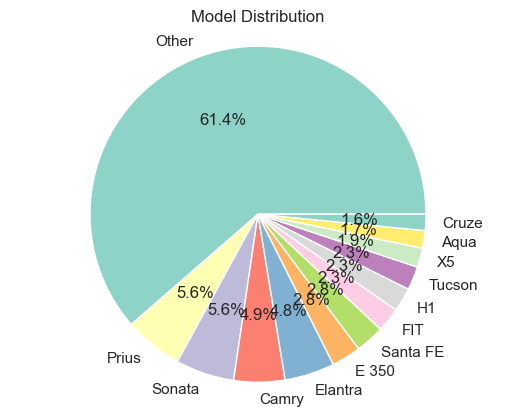

In [63]:
# Select the top 12 models and rename the rest as "Others"
top_models = model_counts.nlargest(12).index
df['Model'] = df['Model'].apply(lambda x: x if x in top_models else 'Other')

# Create a pie chart using matplotlib
plt.pie(df['Model'].value_counts(), labels=df['Model'].value_counts().index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Model Distribution')
plt.show()

#### Category

In [64]:
# Calculate the counts for each category
category_counts = df['Category'].value_counts()
category_counts

Category
Sedan          8600
Jeep           5378
Hatchback      2799
Minivan         633
Coupe           528
Universal       361
Microbus        299
Goods wagon     229
Pickup           51
Cabriolet        35
Limousine        11
Name: count, dtype: int64

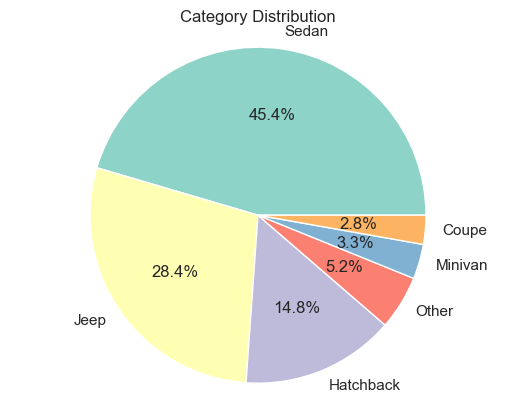

In [65]:
# Select the top 5 categories and rename the rest as "Others"
top_categories = category_counts.nlargest(5).index
df['Category'] = df['Category'].apply(lambda x: x if x in top_categories else 'Other')

# Create a pie chart using matplotlib
plt.pie(df['Category'].value_counts(), labels=df['Category'].value_counts().index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Category Distribution')
plt.show()

#### Leather interior

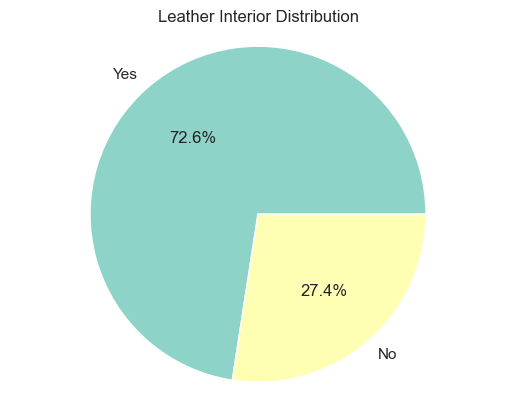

In [66]:
# Calculate the counts for each category
leather_counts = df['Leather interior'].value_counts()

# Create a pie chart using matplotlib
plt.pie(leather_counts, labels=leather_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Leather Interior Distribution')
plt.show()

Replacing 'Yes' and 'No' values in Leather interior to 1 and 0

In [67]:
df['Leather interior'] = df['Leather interior'].map({'Yes': 1, 'No': 0})

#### Fuel type

In [68]:
top_fuel_types = df['Fuel type'].value_counts().nlargest(3).index
df.loc[~df['Fuel type'].isin(top_fuel_types), 'Fuel type'] = 'Other'

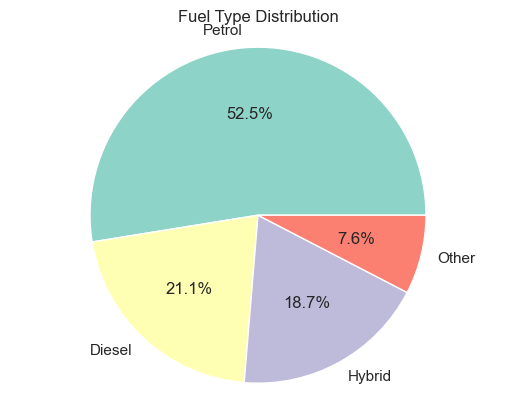

In [69]:
# Calculate the counts for each category
fuel_counts = df['Fuel type'].value_counts()

# Create a pie chart using matplotlib
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Fuel Type Distribution')
plt.show()

#### Engine volume

Lets create a column called Turbo with 1s and 0 if Turbo or not

In [70]:
df['Turbo'] = df['Engine volume'].apply(lambda x: 1 if 'Turbo' in str(x) else 0)

In [71]:
import re
def extract_numeric(volume):
    try:
        return float(volume)
    except:
        vol = volume.split(" ")[0]
        return float(vol)
df['Engine volume'] = df['Engine volume'].apply(lambda x: extract_numeric(x))

Common car engine volume ranges include:

- **Small Cars and Subcompact Cars**: Engine volumes for small and subcompact cars typically range from around 1.0L to 1.6L. These engines are designed for fuel efficiency and city driving.

- **Compact and Midsize Cars**: Compact and midsize cars often have engine volumes ranging from 1.6L to 2.5L. These engines strike a balance between performance and fuel efficiency.

- **SUVs and Crossovers**: SUVs and crossovers typically have larger engine volumes compared to smaller cars. Engine volumes for these vehicles can range from 2.0L to 3.5L or more, depending on the model and purpose.

- **Luxury Cars and Sports Cars**: Luxury cars and sports cars often have more powerful engines. Engine volumes for these vehicles can range from 2.0L to 6.0L or even higher, especially in high-performance sports cars.

- **Trucks and SUVs with V8 Engines**: Trucks and some larger SUVs can come equipped with V8 engines, which offer higher performance and towing capabilities. Engine volumes for V8 engines can range from 4.0L to 6.2L or more.

In [72]:
df = df[(df['Engine volume'] >= 1.0) & (df['Engine volume'] <= 8.0)]

#### Gear box type

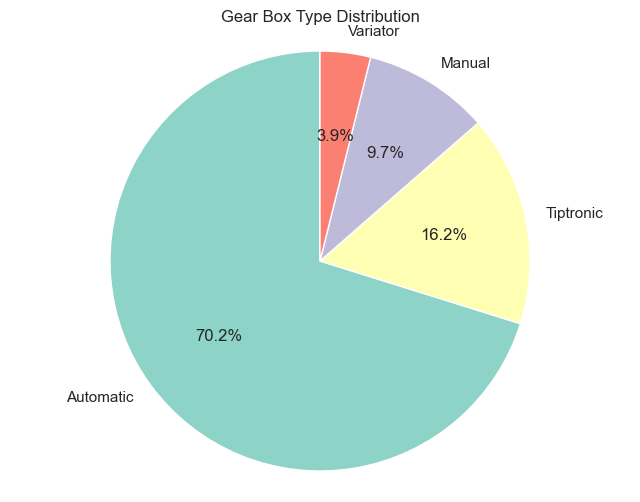

In [73]:
# Count the occurrences of each gear box type
gearbox_counts = df['Gear box type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.title("Gear Box Type Distribution")
gearbox_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.ylabel('')
plt.show()

#### Drive wheels

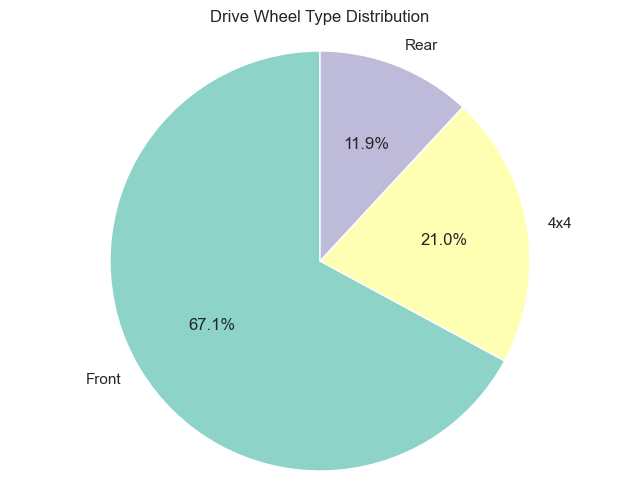

In [74]:
# Count the occurrences of each drive wheel type
drive_wheel_counts = df['Drive wheels'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.set_palette("Set3")
plt.title("Drive Wheel Type Distribution")
drive_wheel_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.ylabel('')
plt.show()

### Doors

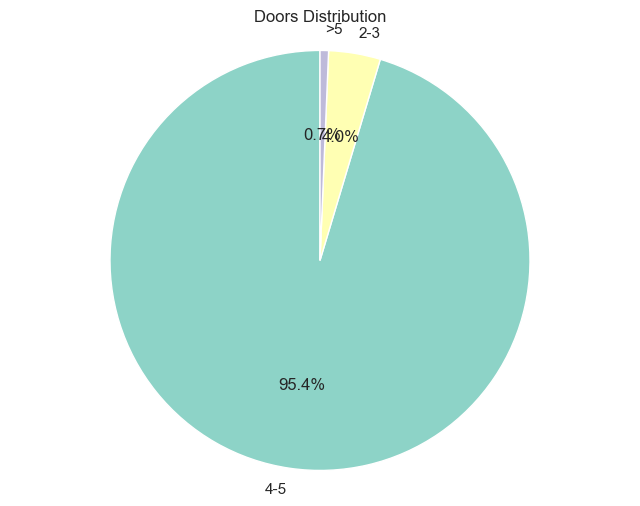

In [75]:
# Count the occurrences of each door count
doors_counts = df['Doors'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.title("Doors Distribution")
doors_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.ylabel('')
plt.show()

#### Wheel

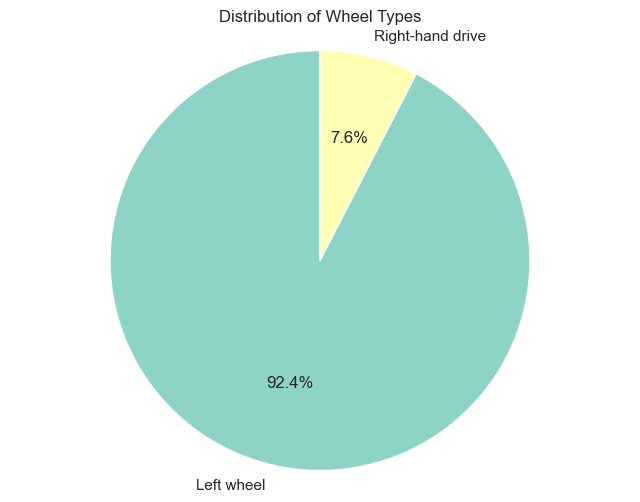

In [76]:
# Count the occurrences of each unique value in the "Wheel" column
wheel_counts = df['Wheel'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.title('Distribution of Wheel Types')
plt.pie(wheel_counts, labels=wheel_counts.index, autopct='%.1f%%', startangle=90)
plt.axis('equal')
plt.show()

#### Color

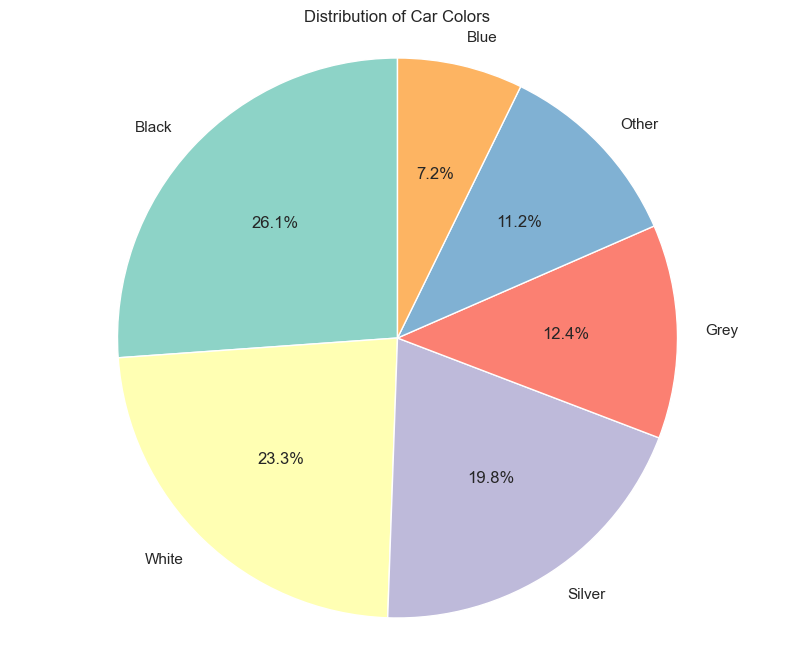

In [77]:
# Count the occurrences of each unique value in the "Color" column
top_colors = df['Color'].value_counts().nlargest(5).index
df['Color'] = df['Color'].apply(lambda x: x if x in top_colors else 'Other')
color_counts = df['Color'].value_counts()
# Create a pie chart
plt.figure(figsize=(10, 8))
plt.title('Distribution of Car Colors')
plt.pie(color_counts, labels=color_counts.index, autopct='%.1f%%', startangle=90)
plt.axis('equal')
plt.show()

### Numerical Columns

In the context of predicting car prices, considering years older than 30 years ago may not be as relevant or useful. Car prices are influenced by various factors, including market demand, depreciation, technological advancements, and changes in consumer preferences. The impact of these factors tends to be more significant in recent years.

Including very old car data may introduce noise and outliers that could negatively affect the accuracy of your price prediction model. Additionally, market dynamics and price trends may have significantly changed over the course of 30+ years, making it challenging to generalize the patterns and relationships between features and car prices.

Therefore, it is generally advisable to focus on more recent car data, typically within the past 10-15 years, to build a predictive model for car prices. This will help ensure that the model captures the most relevant and representative patterns in the data to make accurate price predictions.

Let us replace the years lesser than 2000 as 2000

In [78]:
df['Prod. year'] = df['Prod. year'].apply(lambda x: max(x, 2000))

#### Price, Levy and Mileage

Applying a log transformation can reduce the impact of extreme values. This is useful when the data follows a log-normal distribution.

In [79]:
df['Price'] = np.log1p(df['Price'])
df['Levy'] = np.log1p(df['Levy'])
df['Mileage'] = np.log1p(df['Mileage'])

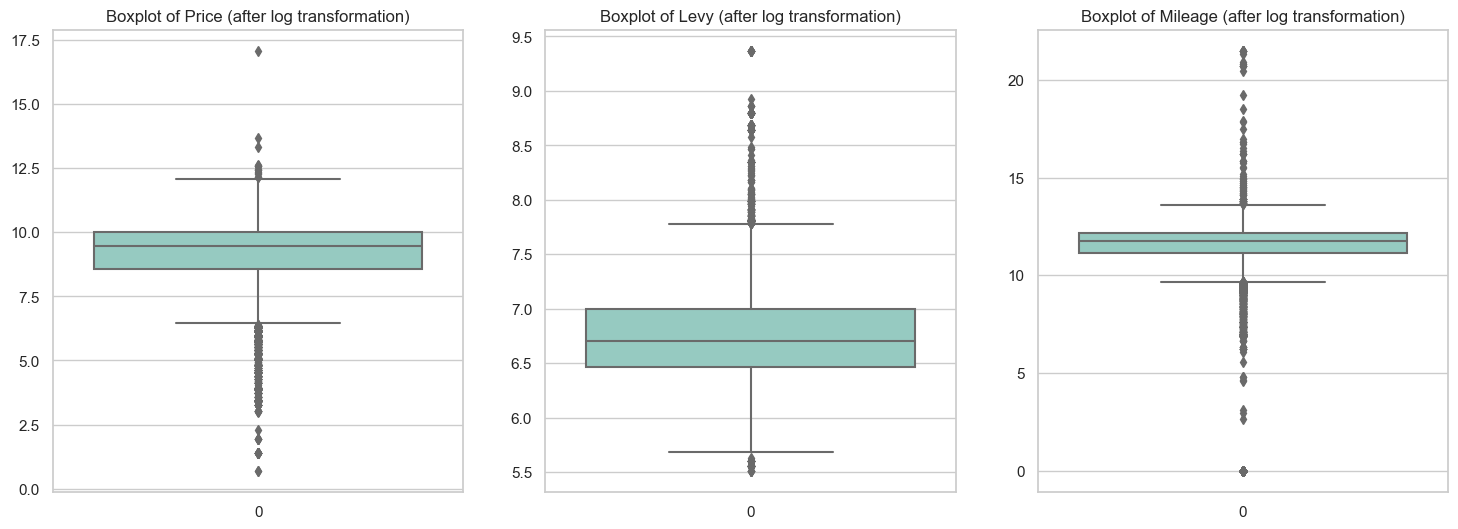

In [81]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot the distribution of 'Price' after log transformation
sns.boxplot(df['Price'], ax=ax[0])
ax[0].set_title('Boxplot of Price (after log transformation)')

sns.boxplot(df['Levy'], ax=ax[1])
ax[1].set_title('Boxplot of Levy (after log transformation)')

# Plot the distribution of 'Mileage' after log transformation
sns.boxplot(df['Mileage'], ax=ax[2])
ax[2].set_title('Boxplot of Mileage (after log transformation)')

plt.show()

In [82]:
# removing outliers and converting back to original scale

def calculate_bounds(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Calculate bounds for 'Price', 'Levy' and 'Mileage'
price_lower_bound, price_upper_bound = calculate_bounds(df['Price'])
levy_lower_bound, levy_upper_bound = calculate_bounds(df['Levy'])
mileage_lower_bound, mileage_upper_bound = calculate_bounds(df['Mileage'])


# Remove outliers
df = df[(df['Price'] >= price_lower_bound) & (df['Price'] <= price_upper_bound)]
df = df[(df['Levy'] >= levy_lower_bound) & (df['Levy'] <= levy_upper_bound)]
df = df[(df['Mileage'] >= mileage_lower_bound) & (df['Mileage'] <= mileage_upper_bound)]

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Levy'] = pd.to_numeric(df['Levy'], errors='coerce')
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df['Price'] = np.expm1(df['Price'])
df['Levy'] = np.expm1(df['Levy'])
df['Mileage'] = np.expm1(df['Mileage'])

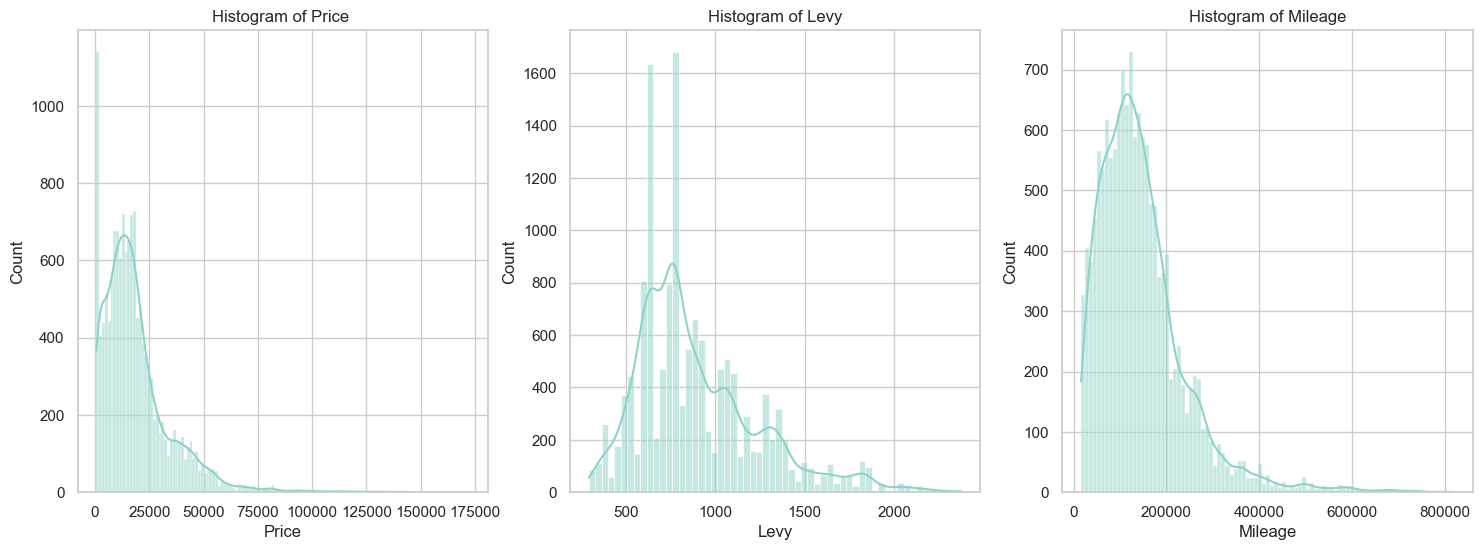

In [84]:
# Create a figure with three subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot the distribution of 'Price' after log transformation
sns.histplot(df['Price'], ax=ax[0], kde=True)
ax[0].set_title('Histogram of Price ')

# Plot the distribution of 'Levy'
sns.histplot(df['Levy'], ax=ax[1], kde=True)
ax[1].set_title('Histogram of Levy')

# Plot the distribution of 'Mileage' after log transformation
sns.histplot(df['Mileage'], ax=ax[2], kde=True)
ax[2].set_title('Histogram of Mileage')

plt.show()

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Levy'}>,
        <Axes: title={'center': 'Prod. year'}>],
       [<Axes: title={'center': 'Leather interior'}>,
        <Axes: title={'center': 'Engine volume'}>,
        <Axes: title={'center': 'Mileage'}>],
       [<Axes: title={'center': 'Cylinders'}>,
        <Axes: title={'center': 'Airbags'}>,
        <Axes: title={'center': 'Turbo'}>]], dtype=object)

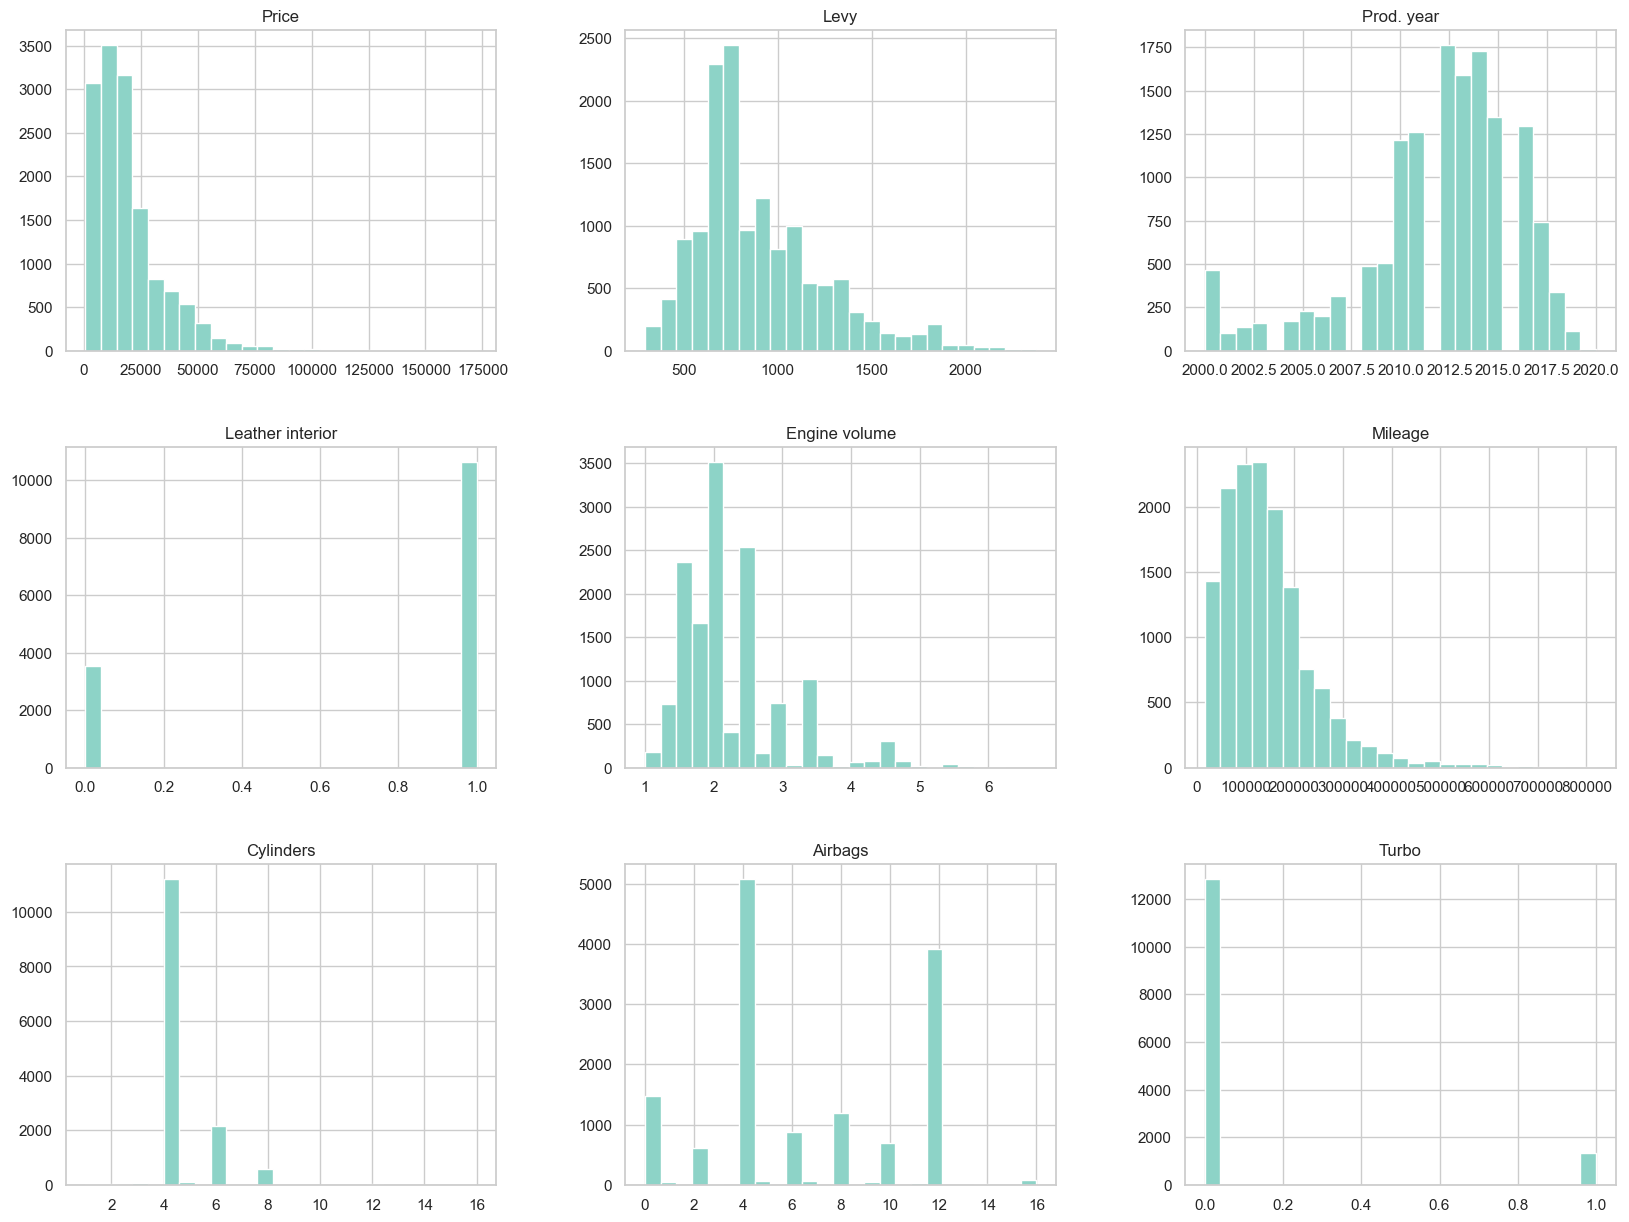

In [85]:
df.hist(bins=25, figsize=(20,15))

<div style="background-color: lightpink; color: black; padding: 10px; border-radius: 10px; text-align: center;">
    <h2>Multivariate Analysis</h2>
</div>

In [86]:
numerical_columns = list(df.columns[df.dtypes!='object'])
numerical_columns

['Price',
 'Levy',
 'Prod. year',
 'Leather interior',
 'Engine volume',
 'Mileage',
 'Cylinders',
 'Airbags',
 'Turbo']

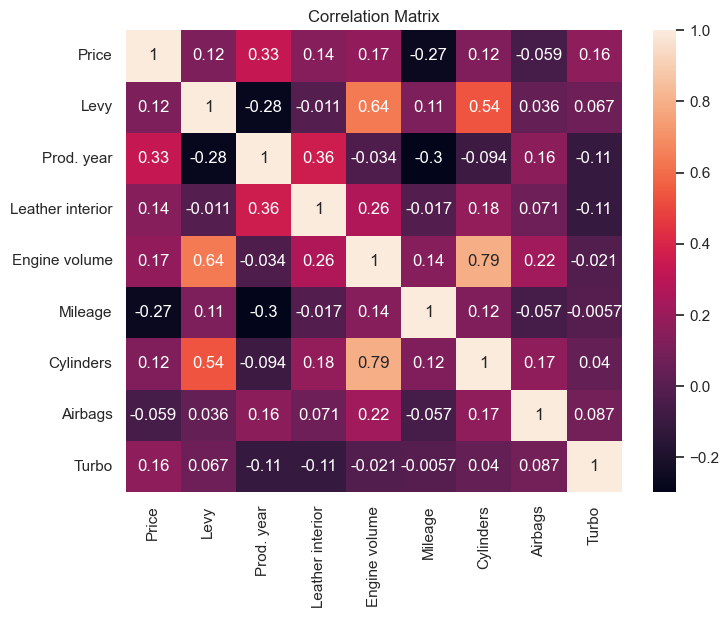

In [87]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_columns].corr(),annot=True, cbar = True)
plt.title('Correlation Matrix')
plt.show()

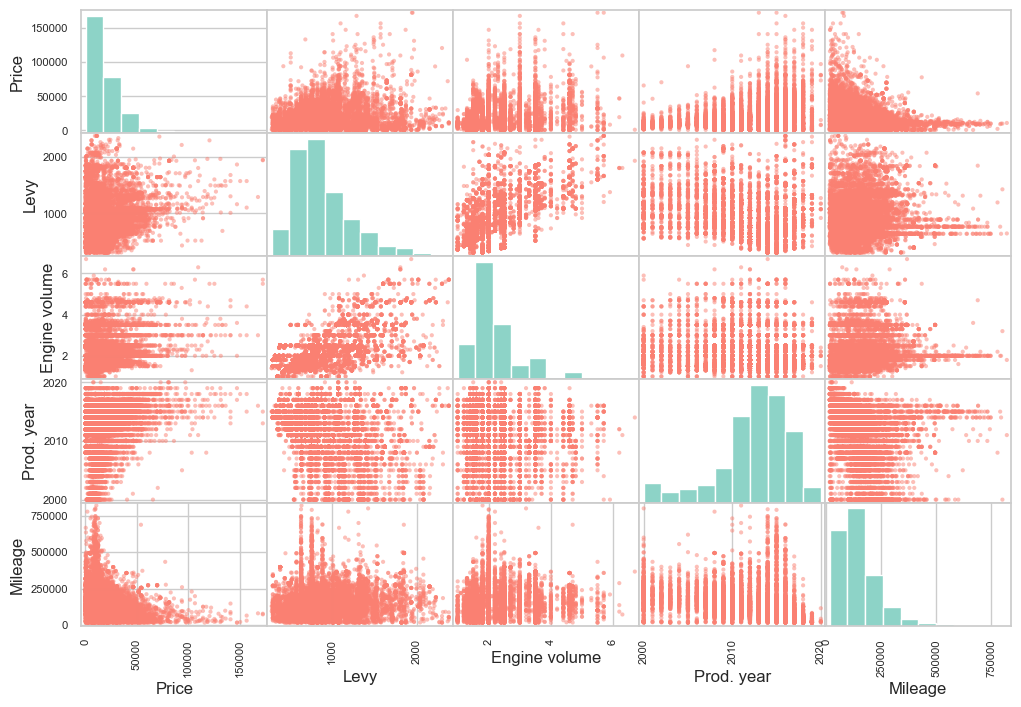

In [88]:
from pandas.plotting import scatter_matrix
attributes = ['Price','Levy','Engine volume','Prod. year','Mileage']
scatter_matrix(df[attributes], figsize=(12,8), color = 'salmon')
plt.show()

### Numerical and Categorical columns vs Price

In [90]:
numerical_columns = ['Levy','Mileage','Prod. year','Engine volume', 'Cylinders','Airbags']
categorical_columns = ['Manufacturer', 'Model', 'Category','Leather interior','Fuel type','Turbo',
                       'Gear box type','Drive wheels','Doors','Wheel','Color']

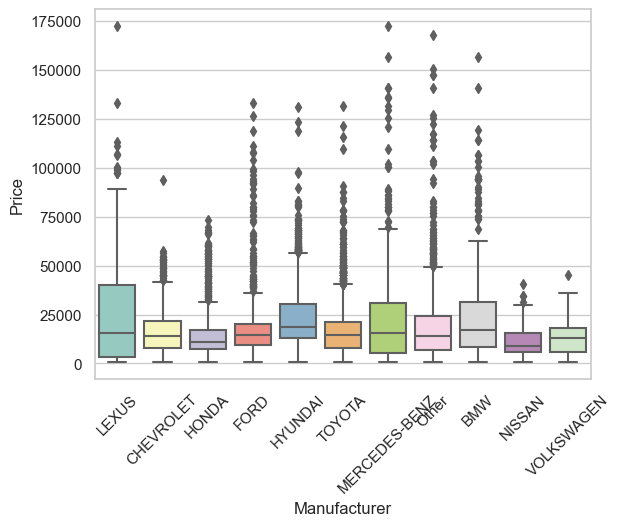

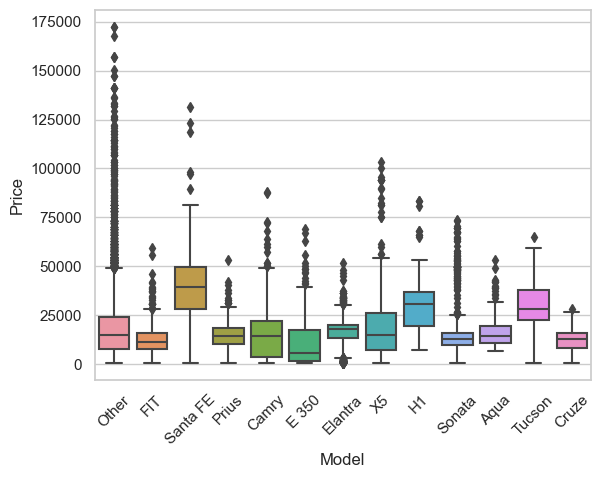

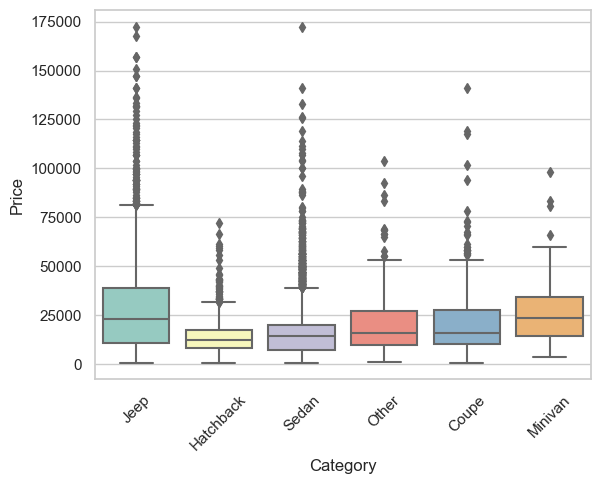

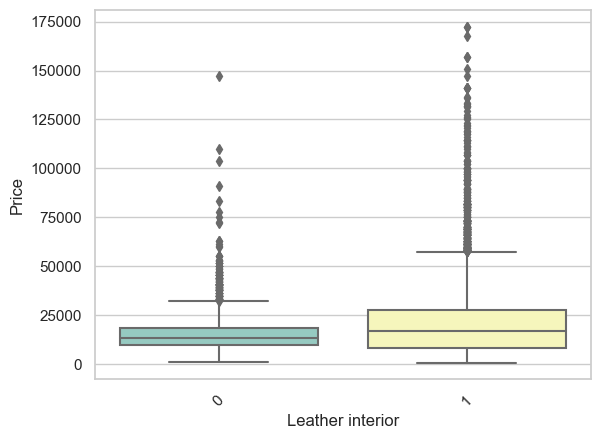

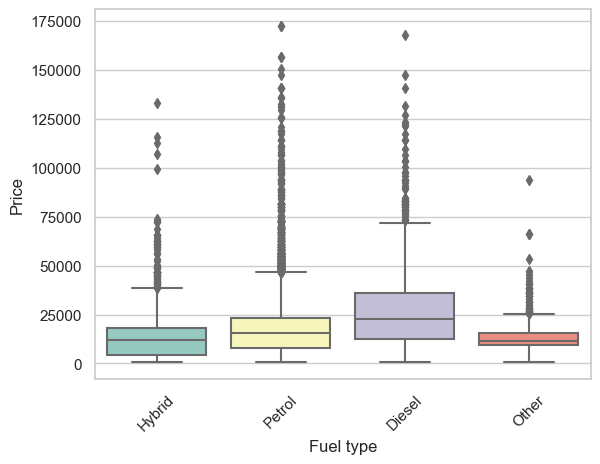

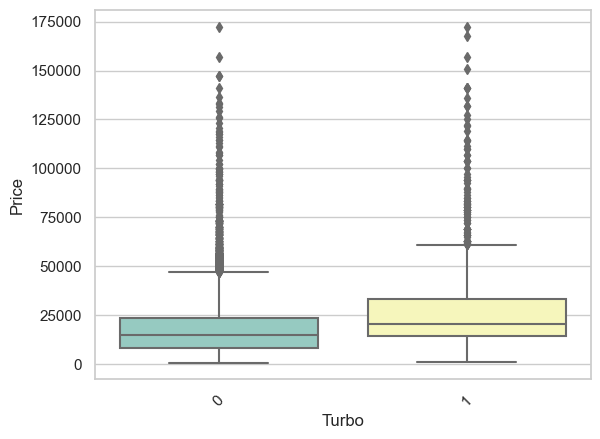

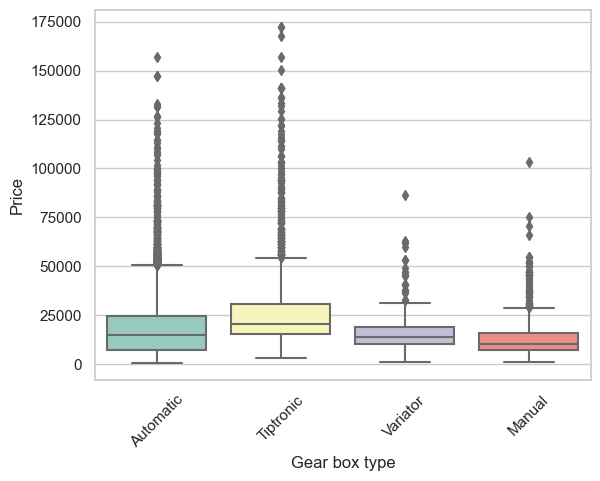

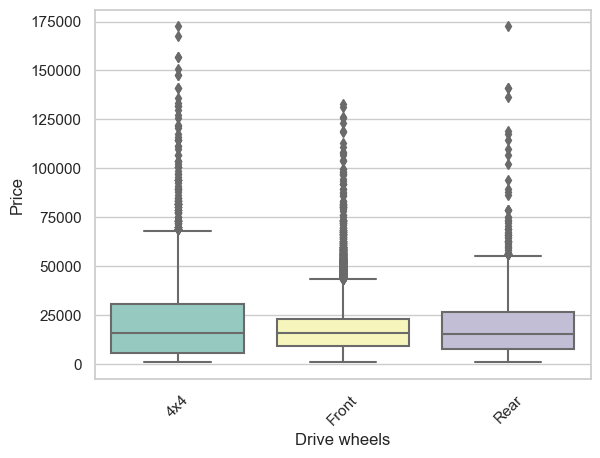

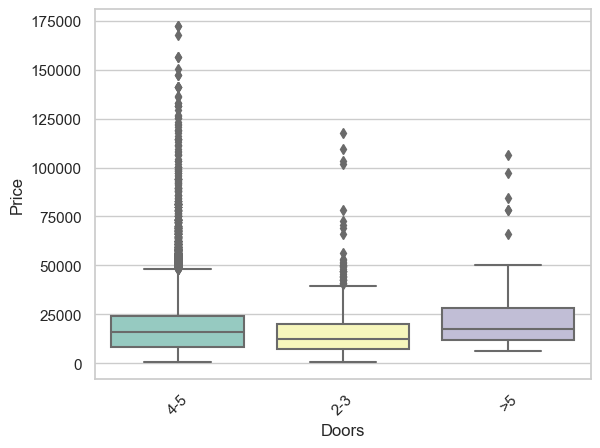

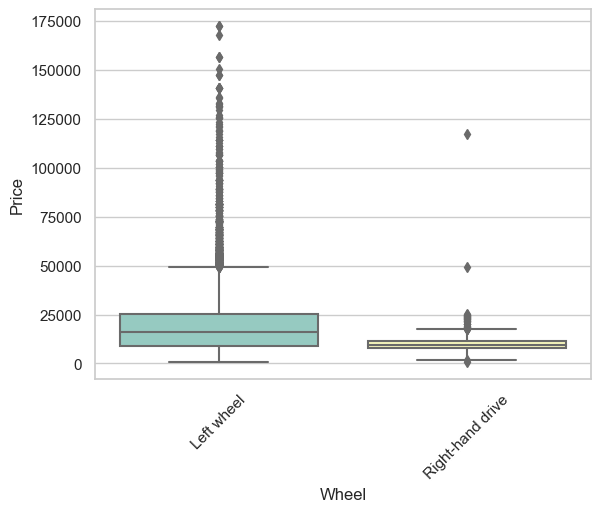

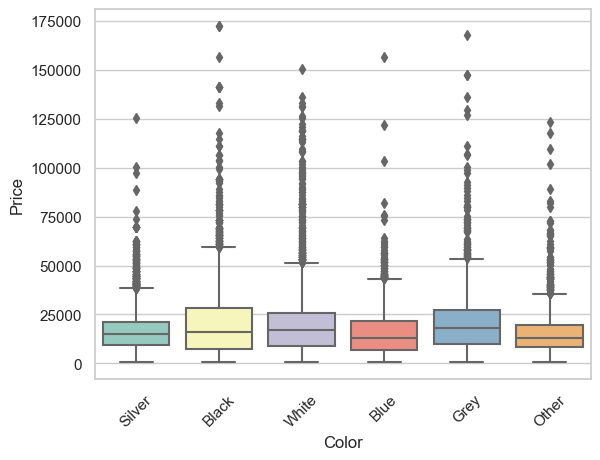

In [91]:
for i in categorical_columns:
    sns.boxplot(data=df, x=i , y='Price')
    plt.xticks(rotation=45)
    plt.show()

In [92]:
# Saving the cleaned dataframe for use in modular coding

df.to_csv("data/cleaned_data.csv", index=False)

In [93]:
X = df.drop(labels=['Price'],axis=1)
Y = df[['Price']]

<div style="background-color: lightpink; color: black; padding: 10px; border-radius: 10px; text-align: center;">
    <h2>Mutual Information</h2>
</div>

### Label Encoder to convert categorical columns to labels

In [94]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder on each of the categorical columns
for column in categorical_columns:
    X[column] = le.fit_transform(X[column])

In [95]:
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(X,Y.values.flatten(),random_state=42)
mi_scores = pd.Series(mi_scores, name="MI Scores",index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

In [100]:
import numpy as np

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores,color = 'purple')
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    plt.show()

Levy                0.856401
Mileage             0.774578
Airbags             0.440429
Engine volume       0.415995
Prod. year          0.389965
Model               0.383826
Manufacturer        0.339074
Fuel type           0.205162
Category            0.197359
Gear box type       0.175407
Cylinders           0.139649
Leather interior    0.138865
Drive wheels        0.130949
Color               0.110147
Wheel               0.057626
Turbo               0.053352
Doors               0.011954
Name: MI Scores, dtype: float64


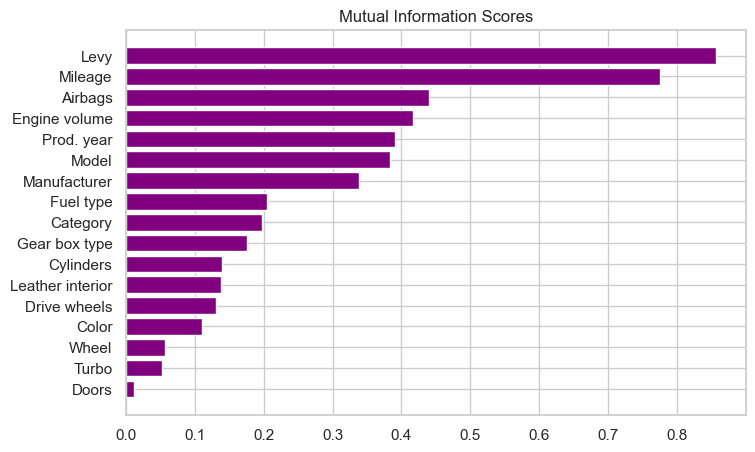

In [101]:
print(mi_scores)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

## Conclusion : Above shows that Levy, Mileage, Airbags, Engine volume and Prod. year are most important features to predict the price of a car